1.- Verificador de eventos consecutivos e igual número de lineas


In [1]:

import os
import pandas as pd

folder_path="./"

files=[f for f in os.listdir(folder_path) if f.endswith(".txt") and "mate-m10" in f]
#aquí agrupo los archivos por fecha
file_groups = {}
for file in files:
    date= "_".join(file.split("_")[:3]) 
    if date not in file_groups:
        file_groups[date] = []
    file_groups[date].append(file)


for date, group in file_groups.items():
    print(f"\nVerificando archivos para la fecha: {date}")
    events ={}
    num_rows= {}
    for file in group:
        file_path= os.path.join(folder_path, file)
        data =pd.read_csv(file_path, header=None, delimiter=",")
        col6= data.iloc[:,5]
        
        #aquí verifico que los archivos sean estrictamente consecutivos
        non_consecutive = col6[col6.diff().fillna(1) != 1]
        if len(non_consecutive)> 0:
            print(f"  -> Error: Eventos no consecutivos en {file}")
            for index in non_consecutive.index:
                print(f"     * Evento no consecutivo en la linea: {index + 1}, Valor: {col6.iloc[index]}")
        else:
            print(f"  -> OK: Eventos consecutivos en {file}")
        num_rows[file]= len(data)
        events[file] =col6.iloc[-1]
    
   
    print("  -> Verificando número de lineas y último evento entre archivos...")
    for file, count in num_rows.items():
        print(f"     * Archivo: {file}, Número de lineas: {count}, Último evento: {events[file]}")
    
    if len(set(num_rows.values())) ==1:
        print("  -> OK: Todos los archivos tienen el mismo número de lineas")
    else:
        print("  -> Error: Diferente número de lineas entre los archivos")



Verificando archivos para la fecha: 2025_01_01
  -> OK: Eventos consecutivos en 2025_01_01_06h00_mate-m101.txt
  -> OK: Eventos consecutivos en 2025_01_01_06h00_mate-m102.txt
  -> OK: Eventos consecutivos en 2025_01_01_06h00_mate-m103.txt
  -> Verificando número de lineas y último evento entre archivos...
     * Archivo: 2025_01_01_06h00_mate-m101.txt, Número de lineas: 192893, Último evento: 15451934
     * Archivo: 2025_01_01_06h00_mate-m102.txt, Número de lineas: 192893, Último evento: 15451934
     * Archivo: 2025_01_01_06h00_mate-m103.txt, Número de lineas: 192893, Último evento: 15451934
  -> OK: Todos los archivos tienen el mismo número de lineas

Verificando archivos para la fecha: 2025_01_02
  -> OK: Eventos consecutivos en 2025_01_02_06h00_mate-m101.txt
  -> OK: Eventos consecutivos en 2025_01_02_06h00_mate-m102.txt
  -> OK: Eventos consecutivos en 2025_01_02_06h00_mate-m103.txt
  -> Verificando número de lineas y último evento entre archivos...
     * Archivo: 2025_01_02_06

2.- Buscador de datos BB BA AA = 00 00 00 

In [ ]:
import os
import pandas as pd

folder_path = "./"
files = [f for f in os.listdir(folder_path) if f.endswith(".txt") and "mate-m10" in f]
for file in files:
    file_path = os.path.join(folder_path, file)
    data = pd.read_csv(file_path, header=None, delimiter=",")
    
    #filtrar filas donde las columnas 2, 3 y 4 sean todas "00"
    rows_with_zeros = data[(data.iloc[:, 1] == "00") & 
                           (data.iloc[:, 2] == "00") & 
                           (data.iloc[:, 3] == "00")]
    
    if not rows_with_zeros.empty:
        print(f"Archivo: {file}")
        print(f"Se encontraron {len(rows_with_zeros)} filas con 00,00,00 en las columnas BB, BA y AA.")
        print("Filas encontradas:")
        for index, row in rows_with_zeros.iterrows():
            print(f"Fila {index + 1}: {row.tolist()}")
    else:
        print(f"Archivo: {file}")
        print("No se encontraron filas con 00,00,00 en las columnas BB, BA y AA.")


Archivo: 2025_01_01_06h00_mate-m101.txt
No se encontraron filas con 00,00,00 en las columnas BB, BA y AA.
Archivo: 2025_01_01_06h00_mate-m102.txt
No se encontraron filas con 00,00,00 en las columnas BB, BA y AA.
Archivo: 2025_01_01_06h00_mate-m103.txt
No se encontraron filas con 00,00,00 en las columnas BB, BA y AA.
Archivo: 2025_01_02_06h00_mate-m101.txt
No se encontraron filas con 00,00,00 en las columnas BB, BA y AA.
Archivo: 2025_01_02_06h00_mate-m102.txt
No se encontraron filas con 00,00,00 en las columnas BB, BA y AA.
Archivo: 2025_01_02_06h00_mate-m103.txt
No se encontraron filas con 00,00,00 en las columnas BB, BA y AA.
Archivo: 2025_01_03_06h00_mate-m101.txt
No se encontraron filas con 00,00,00 en las columnas BB, BA y AA.
Archivo: 2025_01_03_06h00_mate-m102.txt
No se encontraron filas con 00,00,00 en las columnas BB, BA y AA.
Archivo: 2025_01_03_06h00_mate-m103.txt
No se encontraron filas con 00,00,00 en las columnas BB, BA y AA.
Archivo: 2025_01_04_06h00_mate-m101.txt
No se 

3.- GRÁFICO PASTEL PARA UNA FECHA DE PORCENTAJE DE BITS ACTIVOS

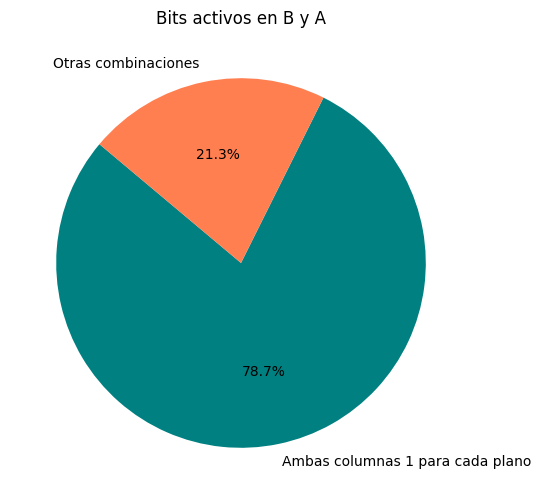

In [13]:
import pandas as pd
import matplotlib.pyplot as plt


file_path = "2024_09_10_06h00_combined_output.txt"  #CAMBIAR SEGÚN ARCHIVO A GRAFICAR


def preprocess_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    preprocessed_lines = []
    for line in lines:
        preprocessed_line = ""
        inside_parentheses = False
        for char in line:
            if char == '(':
                inside_parentheses = True
            elif char == ')':
                inside_parentheses = False
            if char == ',' and inside_parentheses:
                preprocessed_line += ';' 
            else:
                preprocessed_line += char
        preprocessed_lines.append(preprocessed_line)
    return preprocessed_lines

lines = preprocess_file(file_path)

temp_file_path = "temp_preprocessed_file.txt"
with open(temp_file_path, 'w') as temp_file:
    temp_file.writelines(lines)


df = pd.read_csv(temp_file_path, header=None, sep=',', engine='python')

for col in range(len(df.columns)):
    df[col] = df[col].astype(str).str.replace(';', ',', regex=False)


    df[9] = df[9].astype(int)  
    df[10] = df[10].astype(int)  
    df[11] = df[11].astype(int)
    df[12] = df[12].astype(int)
    df[13] = df[13].astype(int)
    df[14] = df[14].astype(int)

#FILTRO
filtered_rows = df[(df[9] == 1) & (df[10] == 1) & (df[11] == 1) & (df[12] == 1) & (df[13] == 1) & (df[14] == 1)]

num_filtered = len(filtered_rows)
num_not_filtered = len(df) - num_filtered

labels = ['Ambas columnas 1 para cada plano', 'Otras combinaciones']
sizes = [num_filtered, num_not_filtered]
colors = ['teal', 'coral']

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Bits activos en B y A')
plt.show()


4.- EVOLUCIÓN TEMPORAL DEL PORCENTAJE DE FILAS CON UN SOLO BIT ACTIVO POR EJE

       Fecha  Porcentaje
0 2024-09-05   78.752616
1 2024-09-06   77.191675
2 2024-09-07   78.875592
3 2024-09-08   78.976538
4 2024-09-09   78.956563
5 2024-09-10   78.747415
6 2024-09-11   78.739134
7 2024-09-12   79.076037


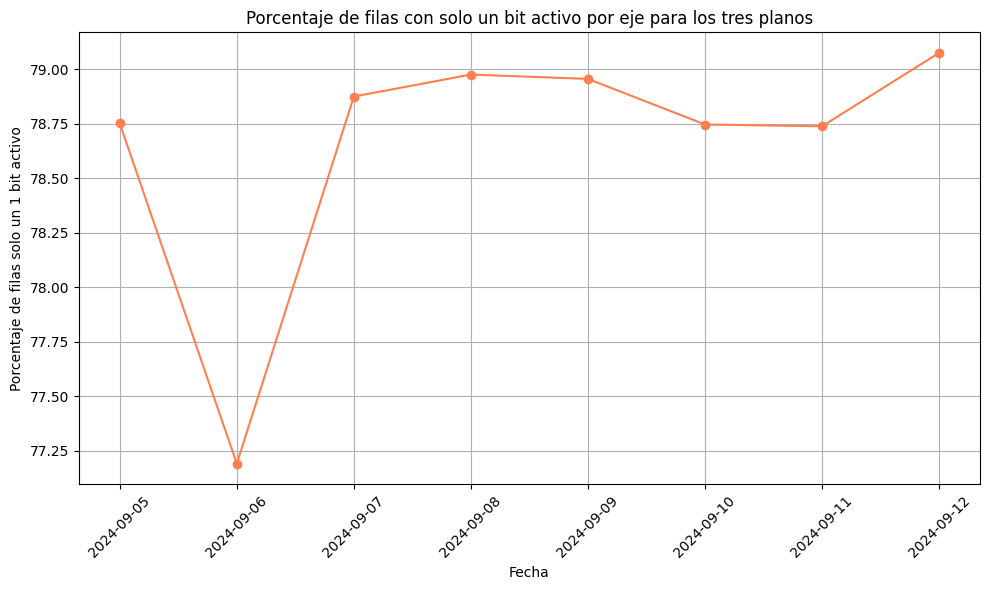

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import re

#ARCHIVOS A GRAFICAR
file_paths = [
    "2024_09_05_06h00_combined_output.txt",
    "2024_09_06_06h00_combined_output.txt",
    "2024_09_07_06h00_combined_output.txt",
    "2024_09_08_06h00_combined_output.txt",
    "2024_09_09_06h00_combined_output.txt",
    "2024_09_10_06h00_combined_output.txt",
    "2024_09_11_06h00_combined_output.txt",
    "2024_09_12_06h00_combined_output.txt"  

]  


def preprocess_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    
    preprocessed_lines = []
    for line in lines:
        preprocessed_line = ""
        inside_parentheses = False
        for char in line:
            if char == '(':
                inside_parentheses = True
            elif char == ')':
                inside_parentheses = False
            if char == ',' and inside_parentheses:
                preprocessed_line += ';'  
            else:
                preprocessed_line += char
        preprocessed_lines.append(preprocessed_line)
    return preprocessed_lines


results = []


for file_path in file_paths:
   
    lines = preprocess_file(file_path)

    #guardar las líneas preprocesadas en un archivo temporal
    temp_file_path = "temp_preprocessed_file.txt"
    with open(temp_file_path, 'w') as temp_file:
        temp_file.writelines(lines)

  
    df = pd.read_csv(temp_file_path, header=None, sep=',', engine='python')

    # Revertir el reemplazo de punto y coma dentro de las columnas con paréntesis
    for col in range(len(df.columns)):
        df[col] = df[col].astype(str).str.replace(';', ',', regex=False)


    df[9] = df[9].astype(int)  
    df[10] = df[10].astype(int)  
    df[11] = df[11].astype(int)
    df[12] = df[12].astype(int)
    df[13] =df[13].astype(int)
    df[14] = df[14].astype(int)


    
    
    filtered_rows =df[(df[9] == 1) & (df[10] == 1) & (df[11] == 1) & (df[12] == 1) & (df[13] == 1) & (df[14] == 1)]

    # Calcular el porcentaje
    percentage = (len(filtered_rows)/ len(df)) *100

    # Extraer la fecha del nombre del archivo (ignorando la hora)
    match =re.search(r"\d{4}_\d{2}_\d{2}", file_path)
    date= match.group(0) if match else "Unknown"

    # Guardar resultados
    results.append({"Fecha": date, "Porcentaje": percentage})

# Crear un DataFrame para resultados
results_df = pd.DataFrame(results)

# Ordenar por fecha y eliminar duplicados
results_df['Fecha'] = pd.to_datetime(results_df['Fecha'], format='%Y_%m_%d')
results_df = results_df.sort_values('Fecha').drop_duplicates(subset='Fecha')

# Mostrar resultados en tabla
print(results_df)

# Graficar resultados
plt.figure(figsize=(10, 6))
plt.plot(results_df['Fecha'], results_df['Porcentaje'], marker='o', linestyle='-', color='coral')
plt.title('Porcentaje de filas con solo un bit activo por eje para los tres planos')
plt.xlabel('Fecha')
plt.ylabel('Porcentaje de filas solo un 1 bit activo')
plt.grid()
plt.xticks(results_df['Fecha'], results_df['Fecha'].dt.strftime('%Y-%m-%d'), rotation=45)
plt.tight_layout()
plt.show()
